<h1>【행정안전부】 2022년 데이터 분석 활용 공모전

<h3>서울시 우리마을가게 상권분석을 하기위해 2019년, 2020년, 2021년의 데이터를 분석합니다. 






*  "서울시 우리마을가게 상권분석서비스(상권-추정매출)" 데이터 다운로드 링크
  - https://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do 
  - 위 링크에서 "파일내려받기" $\rightarrow$ "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.zip", "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.zip", "서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.zip"을 다운로드 받습니다.


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

plt.rcParams["font.family"] = 'NanumGodic'
plt.rcParams["figure.figsize"] = (10,10)

os.chdir("/content/drive/MyDrive/Colab Notebooks/")
addr = "전국 행정구역/ctp_rvn.shp"
geo_data = gpd.read_file(addr)
geo_data.length

0     1.890338e+05
1     4.578478e+05
2     2.152391e+05
3     1.129739e+06
4     1.408953e+05
5     1.580056e+05
6     2.688995e+05
7     1.494989e+05
8     1.900657e+06
9     1.577561e+06
10    7.957023e+05
11    1.591102e+06
12    1.104374e+06
13    6.581468e+06
14    1.324848e+06
15    2.749527e+06
16    4.558080e+05
dtype: float64

In [41]:
geo_data

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."
5,30,Daejeon,´ëÀü±¤¿ª½Ã,"POLYGON ((990946.725 1832389.260, 991057.692 1..."
6,31,Ulsan,¿ï»ê±¤¿ª½Ã,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,¼¼Á¾Æ¯º°ÀÚÄ¡½Ã,"POLYGON ((971235.936 1844386.985, 971234.055 1..."
8,41,Gyeonggi-do,°æ±âµµ,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,42,Gangwon-do,°­¿øµµ,"MULTIPOLYGON (((1163759.191 1909653.101, 11637..."


In [42]:
geo_data.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


In [43]:
plt.rcParams['figure.figsize']=(10,20)

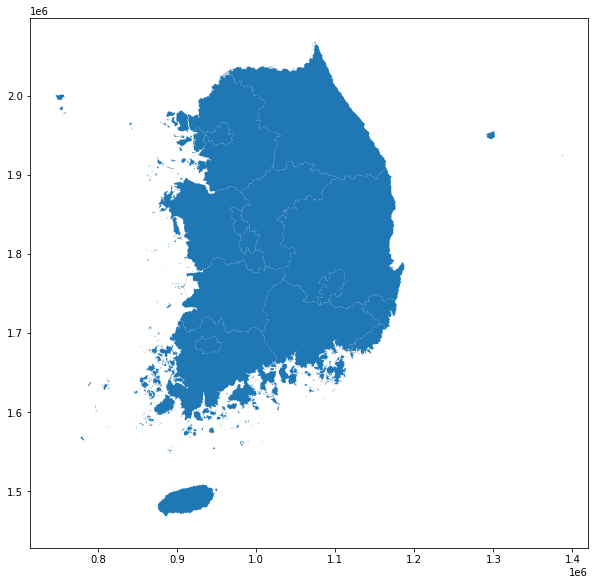

In [44]:
geo_data.plot()
plt.show()

In [45]:
seo = geo_data[geo_data['CTP_ENG_NM'] == "Seoul"]
seo

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."


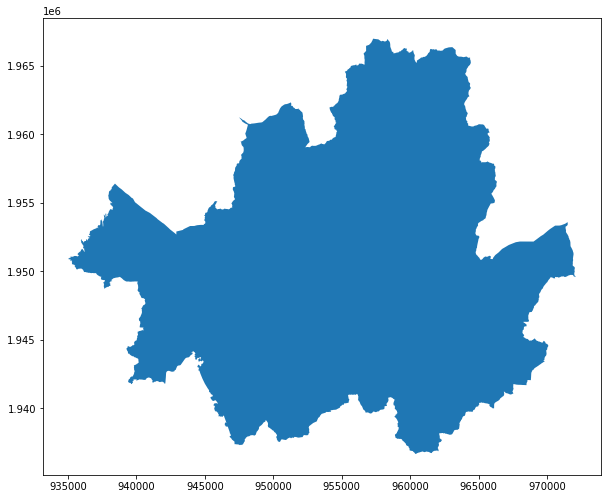

In [46]:
seo.plot()

<h2>서울특별시 구별 지도 시각화

In [47]:
#필요한 라이브러리 설치
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import folium

In [49]:
#위, 경도, 좌표를 기준으로 지도를 그립니다.
# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

In [50]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17,  #zoom_start 정보를 지정하여 확대의 정도를 지정, 최대가 18입니다.
               width=750, 
               height=500
              )
m

In [51]:
#서울 지도에서 행정 구역별 표시
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [52]:
#서울 지역의 구별 boundary 시각화
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

<h3>지도의 테마 변경

Stamen Toner 적용 시

In [53]:
#tiles 옵션 변경을 통해 지도의 테마 변경합니다.
#Stamen Toner 적용 시 아래와 같이 시각화 됩니다.
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='Stamen Toner'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

cartodbpositron 적용 시

In [54]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

<h2>서울시 자치구별 상권정보 시각화

* 소상공인시장진흥공단_상가(상권)정보 csv 파일 시각화  
다운 링크: https://www.data.go.kr/data/15083033/fileData.do 

In [55]:
import pandas as pd

In [56]:
seoul = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202209.csv')

# 필요한 컬럼 정보만 가져옵니다
seoul = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
seoul

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,영등포구,소매,건강/미용식품,37.520613,126.907168
1,성동구,소매,취미/오락관련소매,37.566857,127.049018
2,종로구,소매,시계/귀금속소매,37.571848,126.993530
3,송파구,학문/교육,학원-보습교습입시,37.510967,127.121520
4,서초구,음식,한식,37.488375,126.991394
...,...,...,...,...,...
361485,강서구,소매,의복의류,37.558456,126.854800
361486,서초구,음식,한식,37.486042,126.992590
361487,서초구,소매,가방/신발/액세서리,37.478638,127.040527
361488,강남구,생활서비스,자동차/이륜차,37.523924,127.029347


In [57]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_

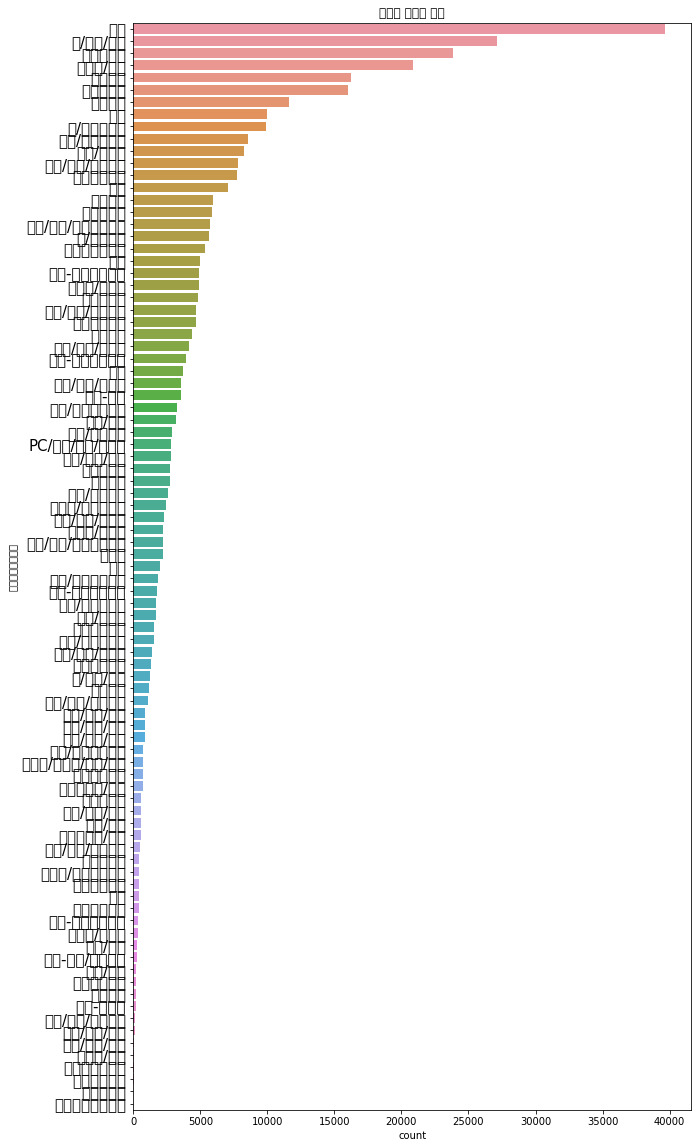

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
 

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rc('font', family='Malgun Gothic') 
#mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 20))
sns.countplot(y=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=15)
plt.title('서울시 업종별 개수')
plt.show()